## Heart Disease Data Analysis and Hypothesis Testing

**Author**: Eduardo Torres\
**Dataset**: Heart Disease\
**Date**: 10/8/25

## Objective
Performs exploratory data analysis and hypothesis testing on Heart Disease Dataset. Attempt to label individuals in the dataset as having or not having Heart Disease through unsupervised learning K-Means Clustering.
***

## 1. Import Data and Libraries
Importing the necessary libraries and load your dataset.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2
from ucimlrepo import fetch_ucirepo 


# Set up plotting
plt.style.use('default')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
#Load Dataset
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
data = heart_disease.data.features 
df = pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
# Information on my Dataset

print("=== DATASET OVERVIEW ===")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"\nBasic Statistics:")
df.describe()

=== DATASET OVERVIEW ===

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Basic Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


## Data Cleanup
Our data has a few missing inputs for the columns ca and thal. In this case since it is only a few missing values I am going to drop them from the data set. Since their vacancy is completely at random, this will not introduce bias because the number of missing inputs is minimal.

In [ ]:
# Majority of this data is clean! Let's drop missing values

df.dropna(inplace=True)
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


=== TARGET VARIABLE ===
Target distribution:
bps_category
Normal                    97
Elevated                  71
Hypertension (Stage 1)    63
Hypertension (Stage 2)    51
Severe Hypertension       15
Name: count, dtype: int64


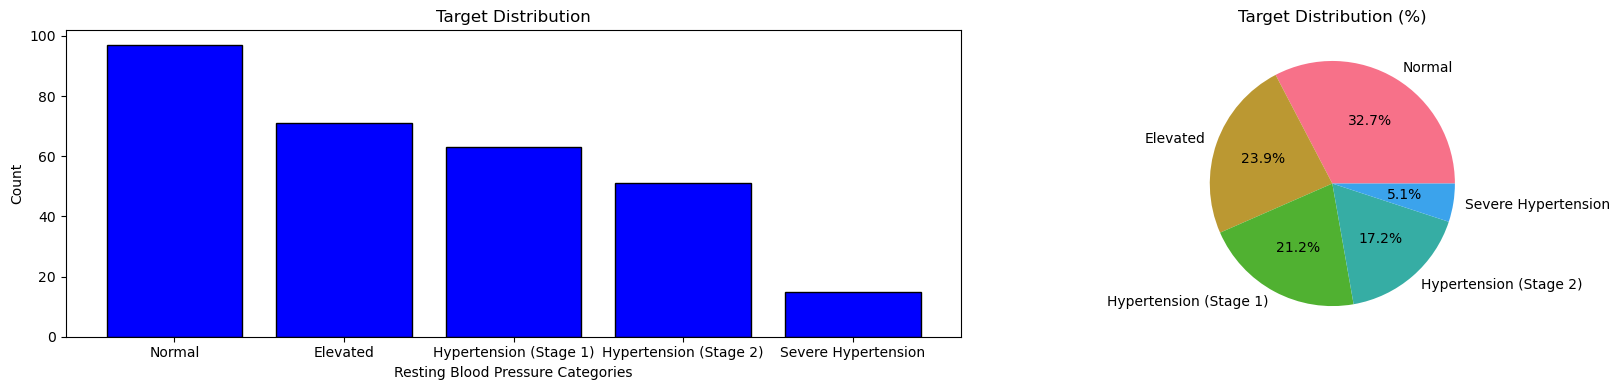

In [ ]:
#Target variable analysis (Target variable is the resting blood pressure) 

print("=== TARGET VARIABLE ===")
#Wow, that's a lot of distinct blood pressure points. Let's separate them into bins
bins =[0, 120, 130, 140, 160, float('inf')]

# Medical Classification of Resting Blood Pressure
labels = ["Normal", "Elevated", "Hypertension (Stage 1)", "Hypertension (Stage 2)", "Severe Hypertension"]
# Creating a new categorical column
df["bps_category"] = pd.cut(df["trestbps"], bins=bins, labels=labels, right=True)

target_counts = df['bps_category'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.bar(target_counts.index, target_counts.values, color = "blue", edgecolor="black")
plt.title('Target Distribution')
plt.xlabel('Resting Blood Pressure Categories')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts, labels= target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()

=== TARGET VARIABLE ===
Target distribution count:
thal_category
Normal               164
Reversible Defect    115
Fixed Defect          18
Name: count, dtype: int64


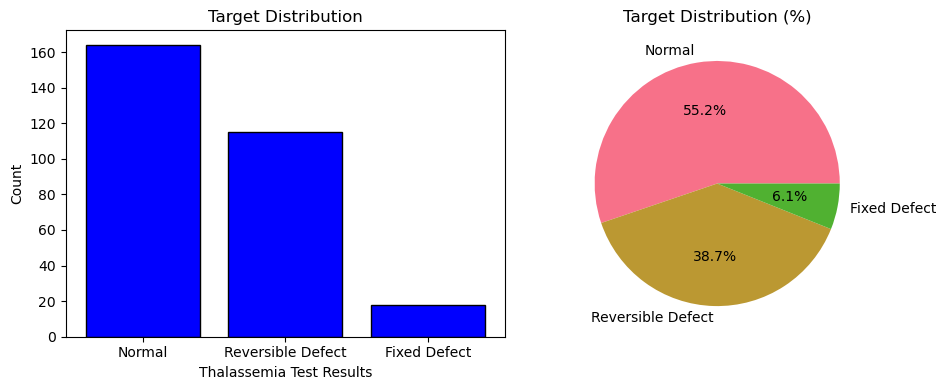

In [ ]:
# Second Target variable analysis (Target variable is Thalassemia Test Result) 
# Thalassemia Test: Helps doctors see how well blood flows into the heart muscle
# during rest and excercise!

print("=== TARGET VARIABLE ===")
#Bins
bins =[0, 3.0, 6.0, 7.0]

# Medical Classification of Resting Blood Pressure
labels = ["Normal", "Fixed Defect", "Reversible Defect"]
# Creating a new categorical column
df["thal_category"] = pd.cut(df["thal"], bins=bins, labels=labels, right=True)

target_counts = df['thal_category'].value_counts()
print(f"Target distribution count:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(target_counts.index, target_counts.values, color = "blue", edgecolor="black")
plt.title('Target Distribution')
plt.xlabel('Thalassemia Test Results')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts, labels= target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()

=== NUMERICAL VARIABLE ===
Numerical Columns: ['age', 'sex', 'cp', 'trestbps', 'exang']


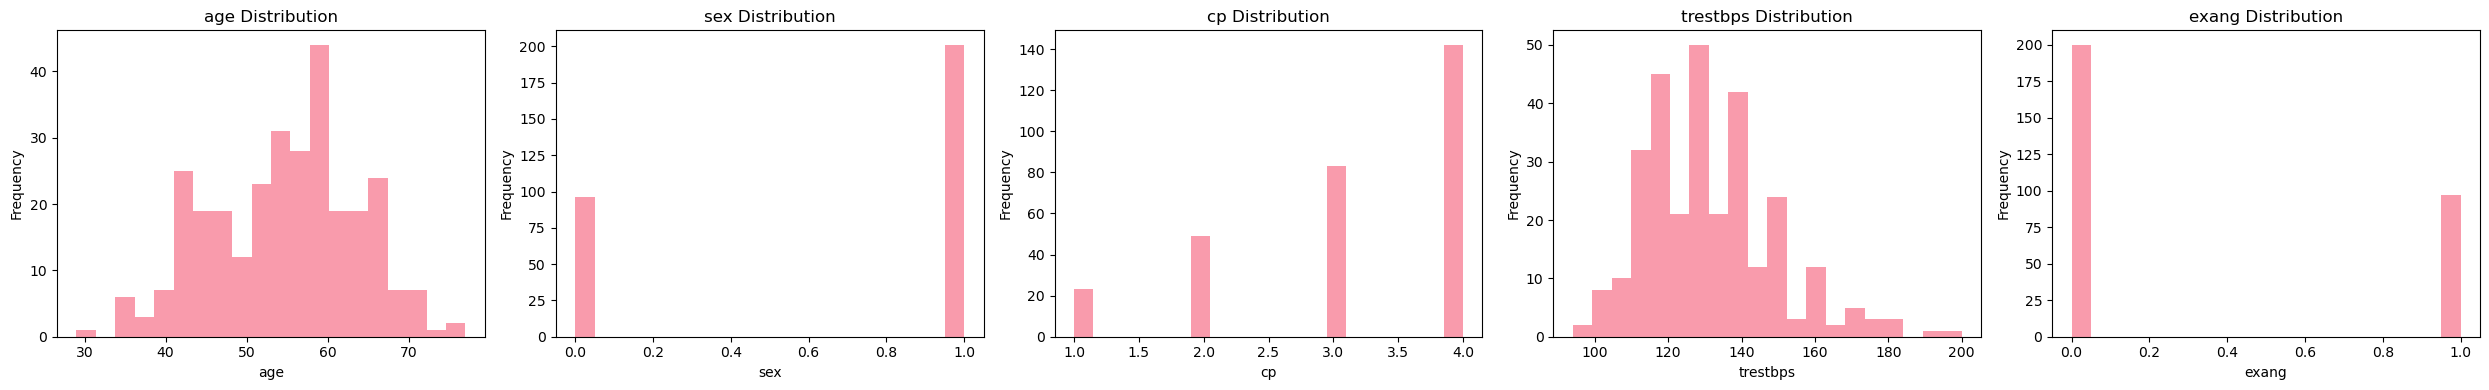

In [ ]:
# Numerical variable analysis (Numerical variable is Serum Cholesterol & Age)
# Make a box plot and a histogram

print("=== NUMERICAL VARIABLE ===")
numerical_cols = ['age', 'sex', 'cp', 'trestbps', 'exang']
print(f"Numerical Columns: {list(numerical_cols)}")

# Visualize target distribution
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== CATEGORICAL VARIABLES ===
Categorical columns: ['age', 'fbs']

age value counts:
age
58    18
57    17
54    16
59    14
60    12
51    12
56    11
62    11
44    11
52    11
64    10
41    10
67     9
63     9
42     8
45     8
55     8
61     8
65     8
50     7
66     7
43     7
48     7
53     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
29     1
77     1
38     1
74     1
76     1
Name: count, dtype: int64


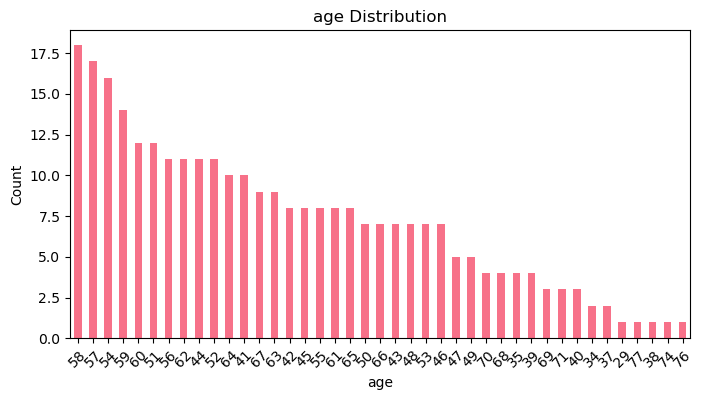


fbs value counts:
fbs
0    254
1     43
Name: count, dtype: int64


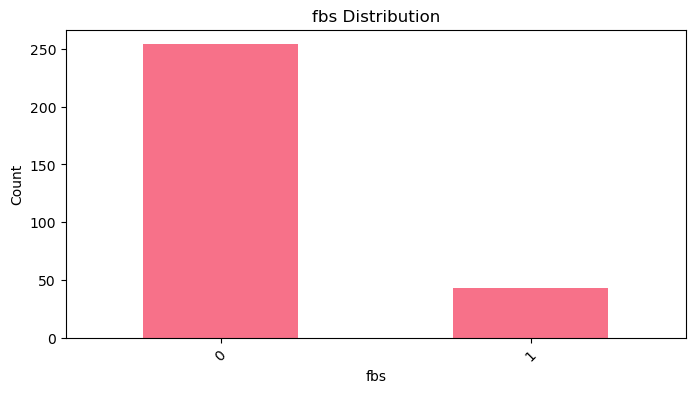

In [ ]:
#Categorical Variable analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = ['age', 'fbs']
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

=== CORRELATION ANALYSIS ===


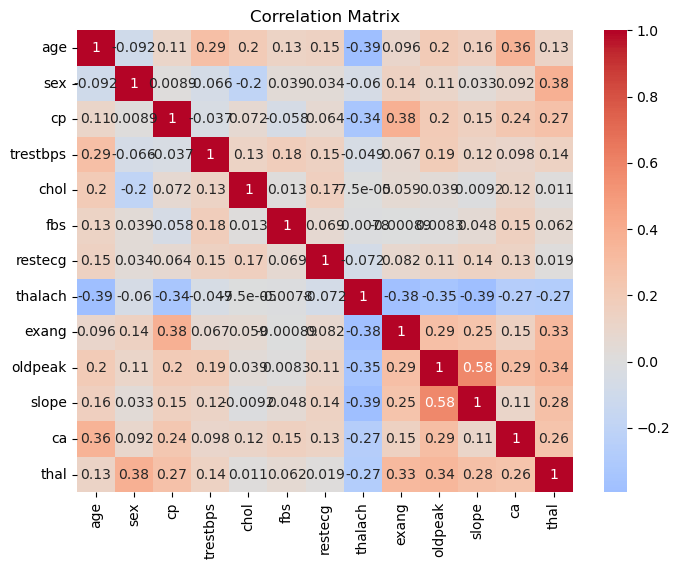

In [ ]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'target' in df.columns:
    target_correlations = correlation_matrix['target'].sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)

=== RELATIONSHIPS WITH TARGET (thal_category) ===


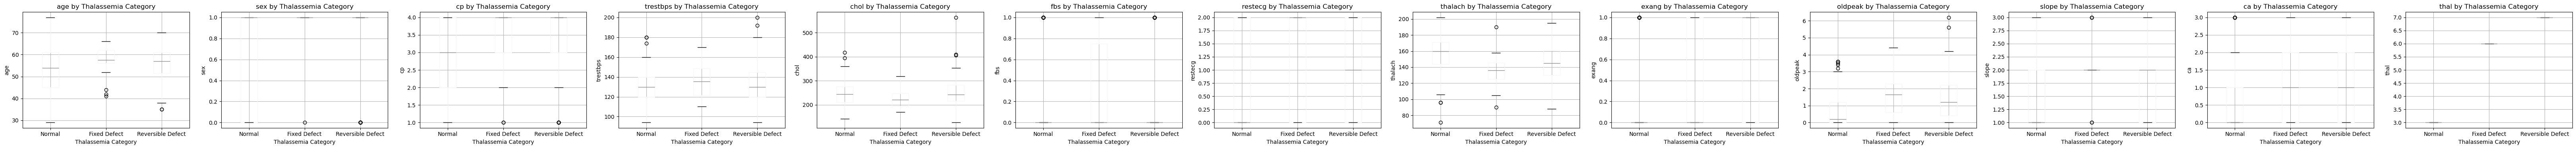


bps_category vs Thalassemia Category:
thal_category           Normal  Fixed Defect  Reversible Defect
bps_category                                                   
Normal                   0.598         0.052              0.351
Elevated                 0.592         0.028              0.380
Hypertension (Stage 1)   0.603         0.063              0.333
Hypertension (Stage 2)   0.451         0.098              0.451
Severe Hypertension      0.200         0.133              0.667


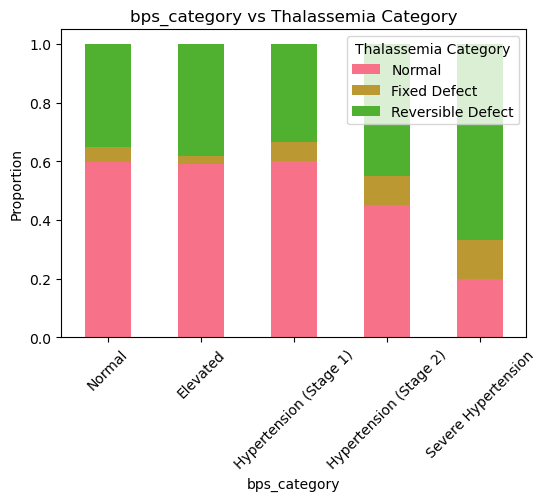

In [ ]:
print("=== RELATIONSHIPS WITH TARGET (thal_category) ===")

# Separate numerical and categorical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Remove the target from each list if it's in there
if 'thal_category' in numerical_cols:
    numerical_cols.remove('thal_category')
if 'thal_category' in categorical_cols:
    categorical_cols.remove('thal_category')

# === 1. Box plots: Numerical variables vs categorical target ===
numerical_cols_no_target = [col for col in numerical_cols if col != 'thal_category']

if len(numerical_cols_no_target) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(5*len(numerical_cols_no_target), 4))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='thal_category', ax=axes[i])
        axes[i].set_title(f'{col} by Thalassemia Category')
        axes[i].set_xlabel('Thalassemia Category')
        axes[i].set_ylabel(col)
    
    plt.suptitle("")  # remove auto title
    plt.tight_layout()
    plt.show()

# === 2. Crosstabs: Categorical variables vs categorical target ===
for col in categorical_cols:
    print(f"\n{col} vs Thalassemia Category:")
    crosstab = pd.crosstab(df[col], df['thal_category'], normalize='index')
    print(crosstab.round(3))
    
    # Bar plot for visualization
    crosstab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f'{col} vs Thalassemia Category')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Thalassemia Category')
    plt.xticks(rotation=45)
    plt.show()


## Prediction and Pattern Recognition

Our dataset tells us a variety of different cases regarding the health of people's hearts. However, it lacks a column telling us whether the person had heart disease or not! I will use machine learning to identify and predict which people from this dataset are likely to have heart disease through an unsupervised algorithm. K-Means will cluster people of similar situations and help us decide!

In [ ]:
# Defining KMeans Clustering (This counts as hypothesis testing fix tmr)

class KMeans:
    def __init__(self, n_clusters=3, max_iters=300, tol=1e-4, random_state=None, init='kmeans++'):
        self.n_clusters = int(n_clusters)
        self.max_iters = int(max_iters)
        self.tol = float(tol)
        self.random_state = random_state
        self.init = init
        self.centroid = None
        self.labels_ = None
        self.inertia_ = None
        self.n_iter = 0

    def _init_centroids_random(self, X, rng):
        n_samples = X.shape[0]
        indices = rng.choice(n_samples, self.n_clusters, replace=False)
        return X[indices].astype(float).copy

    def _init_centroids_kmeanspp(self, X, rng):
        """
        kmeans++ initialization:
        - pick first centroid uniformly at random
        - for each subsequent centroid, choose a point with probability proportional
        to the squared distance to the nearest existing centroid
        """

        n_samples, n_features = X.shape
        centroids = np.empty((self.n_clusters, n_features), dtype=float)

        #initial centroid
        first_idx = rng.randint(0, n_samples)
        centroids[0] = X[first_idx]

        # distances squared to nearest centroid so far
        closest_dist_sq = np.sum((X - centroids[0])**2, axis=1)
        for i in range(1, self.n_clusters):
            # this picks the next centroid index with probability proportional to distance**2
            probs = closest_dist_sq / np.sum(closest_dist_sq)
            next_idx = rng.choice(n_samples, p=probs)
            centroids[i] = X[next_idx]

            #update nearest distance 
            dist_sq_to_new = np.sum((X - centroids[i])**2, axis=1)
            closest_dist_sq = np.minimum(closest_dist_sq, dist_sq_to_new)
        return centroids

    def _compute_distance(self, X, centroid):
        #Computes Euclidean distances between points and centroid
        #It'll return the distances shape (n_samples, n_clusters)
        diff = X[:, np.newaxis, :] - centroid[np.newaxis, :, :]
        distances = np.linalg.norm(diff, axis=2)
        return distances

    def fit(self, X):
        # Fits K-means on X
        X = np.asarray(X, dtype=float)
        rng = np.random.RandomState(self.random_state)

        # Initialize Centroids
        if self.init == 'random':
            centroids = self._init_centroids_random(X,rng)
        elif self.init == 'kmeans++':
            centroids = self._init_centroids_kmeanspp(X, rng)
        else:
            raise ValueError("init must be 'random' or 'kmeans++'")

        for i in range(1, self.max_iters+1):
            distances = self._compute_distance(X, centroids)
            labels = np.argmin(distances, axis=1) #assignment part

            #update step: recomputing centroids as mean of assigned points
            new_centroid = np.zeros_like(centroids)
            for j in range(self.n_clusters):
                members = X[labels == j]
                if len(members) == 0:
                    # means it's an empty cluster: reinstate this centroid to a random point
                    new_centroid[j] = X[rng.randint(0, X.shape[0])]
                else:
                    new_centroid[j] = members.mean(axis=0)


            # check convergence by centroid movement
            centroid_shift = np.linalg.norm(new_centroid - centroids, axis=1)
            centroids = new_centroid
            if np.max(centroid_shift) <= self.tol:
                self.n_iter_ = i
                break
            self.n_iter_ = i
        # final assignments
        distances = self._compute_distance(X, centroids)
        labels = np.argmin(distances, axis=1)
        # points that remain unchanged
        inertia = np.sum((X - centroids[labels])**2)
 
        # save final placements
        self.centroids = centroids
        self.labels_ = labels
        self.inertia_ = float(inertia)

        return self

    def predict(self, X):
        # Assign labels for new points based on fitted centroids!
        if self.centroids is None:
            raise ValueError("Model not fitted yet. Call fit(X) first.")
        X = np.asarray(X, dtype=float)
        distances = self._compute_distance(X, self.centroids)
        return np.argmin(distances, axis=1)

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

    def plot_clusters(self, X, ax=None, show_centroids=True):
        # Simple 2D scatter of clusters created
        if X.shape[1] != 2:
            raise ValueError("plot_clusters only supports 2D data")
        if ax is None:
            fig, ax = plt.subplots(figsize=(7,5))
        labels = self.labels_
        for k in range(self.n_clusters):
            members = X[labels == k]
            ax.scatter(members[:, 0], members[:, 1], s=20, label=f"Cluster {k}", alpha=0.6)
        if show_centroids and self.centroids is not None:
            ax.scatter(self.centroids[:,0], self.centroids[:,1], s=200, marker='X', c='black', label='Centroids')
            ax.legend()
            ax.set_title(f"KMeans (k={self.n_clusters})")
            return ax
        

In [ ]:
# Preparing Data for KMeans

#Turning Categorical Data into numerical(i.e., True -> 1, False-> 0)
df_processed = pd.get_dummies(df, drop_first=False)
X = df_processed.values

#Setting Min-Max scales for processed data
# First calculate min and max for each column
min_vals = X.min(axis=0)
max_vals = X.max(axis=0)
range_vals = max_vals-min_vals

# Avoiding future errors by setting the range to 1 for constant values in columns
range_vals[range_vals ==0] = 1

# Apply Scaling defined above
X_scaled = (X-min_vals) / range_vals

#KMeans Clustering Implemeted
# We will make two clusters in attempt to seperate people with and without heart disease
final_kmean_clusters = KMeans(n_clusters=2, random_state=42)
# fit the model to scaled data
final_kmean_clusters.fit(X_scaled)
labels = final_kmean_clusters.labels_

cluster_count = np.bincount(labels)
print(f"KMeans model fitted with {final_kmean_clusters.n_clusters} clusters.")
print(f"The number of data points assigned to each cluster are: Cluster 0: {cluster_count[0]}, Cluster 1: {cluster_count[1]}")
df_processed["cluster"]=labels



KMeans model fitted with 2 clusters.
The number of data points assigned to each cluster are: Cluster 0: 164, Cluster 1: 133


## Hypothesis Formulation

# H1: There exists a significant mean difference in resting blood pressure in both clusters.
H0: x̄0 = x̄1\
H1: x̄0 ≠ x̄1\
If the two clusters have significantly different means, then K-Means correctly separated people's blood pressure profiles, aiding the validity of clustering.

# H2: There exists a significant difference between the distribution of Thalassemia Test Result from the original dataset and the distribution from the clusters
Thal = k, c0=cluster0 , c1=cluster1\
H0: P(k|c0) = P(k|c1) for all k ∈ {thal types}\
H1: P(k|c0) ≠  P(k|c1) for at least one k\
If the clustered distribution is not identical to the original data's distribution, then K-Means clusters are independent, supporting successful grouping.

# H3: K-Means identifying people with Heart Disease from our Dataset
H3: Utilizing the unsupervised clustering algorithm K-Means, two distinct clusters
Were created, separating the data. If there is a significant difference in our target variables, then K-Means successfully separated the data into people with heart disease and people without.

H0: H1 & H2 are supported and hold to be True\
H1: H1 or H2 are not supported\
If Hypotheses 1 and 2 hold, then our K-Means clusters correctly diagnose individuals with and without heart disease.

In [ ]:
# Hypothesis #1 Testing
print("=== TESTING HYPOTHESIS 1 ===")
"""
Unfortunately, as seen in the visualizations above, resting blood pressure is
not normally distributed, therefore we will be using the Mann-Whitney U test.
"""
# Separating Clusters!
cluster0 = df_processed[df_processed["cluster"]==0]
cluster1 = df_processed[df_processed["cluster"]==1]

# Selecting categories needed
c0_trestbps = cluster0['trestbps']
c1_trestbps = cluster1['trestbps']

# Two-sided Mann-Whitney U Test 
u_stat, t_p_value = stats.mannwhitneyu(c0_trestbps, c1_trestbps, alternative='two-sided')

print(f"U Statistic: {u_stat: .3f}")
print(f"P-value:{t_p_value: .4f}")


#Interpretation: we will use a 99% Confidence Level
alpha = 0.01
if alpha < t_p_value:
    print(f"We fail to reject the H0 since {alpha} < {t_p_value: .4f}.\nWe have evidence to believe there is a significant difference")
else:
    print(f"We reject the H0 since {alpha} > {t_p_value: .4f}. \nWe have evidence to believe there is no significant difference")


=== TESTING HYPOTHESIS 1 ===
U Statistic:  9363.000
P-value: 0.0356
We fail to reject the H0 since 0.01 <  0.0356.
We have evidence to believe there is a significant difference


In [ ]:
# Hypothesis #2 Testing
#find out how to make contingency table
print("=== TESTING HYPOTHESIS 2 ===")
"""
We will utilize a Chi-Square test to verify if the distributions are independent
"""

# Getting values from original dataset
normal = 0
reversible = 0
fixed = 0

for i in df['thal_category']:
    if i == 'Normal':
        normal += 1
    elif i == "Reversible Defect":
        reversible += 1
    else:
        fixed += 1


c0_thal = [sum(cluster0["thal_category_Normal"]),sum(cluster0["thal_category_Reversible Defect"]),sum(cluster0["thal_category_Fixed Defect"])]
c1_thal = [sum(cluster1["thal_category_Normal"]),sum(cluster1["thal_category_Reversible Defect"]),sum(cluster1["thal_category_Fixed Defect"])]     
df_thal = [normal, reversible, fixed]    

thal_data = [c0_thal, c1_thal, df_thal]

# Contingency Table we will use for chi-square
thal_df = pd.DataFrame(thal_data, columns=['Normal', 'Reversible Defect', 'Fixed Defect'])
thal_df.index = ['Cluster 0', 'Cluster 1', 'Original Data']
thal_df

#Cluster 0 Frequencies, values taken from contingency table above
row_total = np.sum(thal_df,axis=0)
column_total = np.sum(thal_df, axis=1)
grand_total = np.sum(thal_df.values)


# Calculate expected frequencies
expected_data = np.outer(row_total, column_total) / grand_total

# Calculate the chi-square statistic
chi_square_statistic = np.sum((thal_df.values - expected_data)**2 / expected_data)

# Calculate degrees of freedom
rows = thal_df.shape[0]
columns = thal_df.shape[1]
degrees_of_freedom = (rows - 1) * (columns - 1)
chi_p_value = chi2.sf(chi_square_statistic, degrees_of_freedom)

print(f"Observed Data:\n{thal_df}")
print(f"\nExpected Data:\n{expected_data}")
print(f"\nChi-Square Statistic: {chi_square_statistic:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

# Let's use the same 99% Confidence Interval
alpha = 0.01
if alpha < chi_p_value:
    print(f"We fail to reject the H0 since {alpha} < {chi_p_value: .4f}.\nWe have evidence to believe there is a significant difference")
else:
    print(f"We reject the H0 since {alpha} > {chi_p_value: .4f}. \nWe have evidence to believe there is no significant difference")

=== TESTING HYPOTHESIS 2 ===
Observed Data:
               Normal  Reversible Defect  Fixed Defect
Cluster 0         164                  0             0
Cluster 1           0                115            18
Original Data     164                115            18

Expected Data:
[[ 90.55892256  73.44107744 164.        ]
 [ 63.5016835   51.4983165  115.        ]
 [  9.93939394   8.06060606  18.        ]]

Chi-Square Statistic: 4327.3174
Degrees of Freedom: 4
We reject the H0 since 0.01 >  0.0000. 
We have evidence to believe there is no significant difference


## Hypothesis 3:

We reject the null hypothesis due as a result of hypothesis 2 failing to hold there is no significant difference in the categorical data meaning they are not independent from one another. We have evidence to say that K-Means unsupervised clustering failed even though it correctly seperated people based on their resting heart beat. Since it still made the data dependent on the original data.

## Summary and Conclusions

The dataset we analyzed in this assignment contains observations on the heart health of various individuals. As we can see in the visualizations above, this data is not part of a normal distribution. The individuals are all unique cases, making this data extremely skewed. An interesting detail as well is that the data doesn't provide a column confirming who has and doesn't have heart disease. An interesting relationship in this dataset was that people with chest pain most likely also had excercise induced angina. This caught my attention since they had one of the highest correlation. I had originally thought that resting blood pressure and cholesterol would have the highest correlation.

In [ ]:
h1 = ["T-test", t_p_value, "Significant", "Bloodpressure Clustering successful"]
h2 = ["Chi squared-test", chi_p_value, "Not Significant", "Categories are dependent"] 
h3 = ["Meta Hypothesis", "N/A", "Not Significant", "K-Means clustering unsuccessful"]

hypo_column = [h1, h2, h3]

# Hypothesis table
hypo_df = pd.DataFrame(hypo_column, columns=['Test Used', 'p-value', 'Result', 'Intepretation'],
                      index=["H1", "H2", "H3"])
hypo_df

,Test Used,p-value,Result,Intepretation
H1,T-test,0.035569,Significant,Bloodpressure Clustering successful
H2,Chi squared-test,0.0,Not Significant,Categories are dependent
H3,Meta Hypothesis,N/A,Not Significant,K-Means clustering unsuccessful


## Key Insights:

The table above is the result of my attempt to utilize machine learning in order to determine who has heart disease in the dataset. Unfortunately, as we can see, the unsupervised clustering method I used turned out to be unreliable. For both my T-test and Chi-squared test, I used a 99% confidence level in order to get the best results. However, Hypothesis 2 proved that there was no independence between the clusters and the original data. This illustrates the limitations of not having data to train a model on. If both hypotheses were to hold, there would be evidence to believe that K-means correctly separated people with and without heart disease. The K-Means algorithm had to create labels and discern itself who might have heart disease based on similarities in health between individuals. If there had been a labeled column, I would have been able to create a reliable learning algorithm using K Nearest Neighbors instead.

## Future Research:
Additional analysis that could be conducted would be discerning correlations between variables and comparing them to actual severity symptoms of heart disease to see which variables are the most important to be aware of. For instance, chest pain and cholesterol could be another set of target variables that greatly affect the possibility of someone having heart disease.